# Grid World --- past all grids
##### Charles Zhang
##### Jun 17

###  1. Cover and Get Back

In [1]:
import numpy as np

In [2]:
BOARD_ROWS = 4
BOARD_COLS = 5
START = (0, 0)
END = (0, 0)

In [3]:
class State:

    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.state = state    # tuple of the coordinate
        self.is_end = False

    def check_end(self):
        if self.state == END:
            self.is_end = True

    def next_position(self, action):
        if action == "up":
            next_state = (self.state[0] - 1, self.state[1])
        elif action == "down":
            next_state = (self.state[0] + 1, self.state[1])
        elif action == "left":
            next_state = (self.state[0], self.state[1] - 1)
        else:
            next_state = (self.state[0], self.state[1] + 1)
        if (next_state[0] >= 0) and (next_state[0] < BOARD_ROWS):
            if (next_state[1] >= 0) and (next_state[1] < BOARD_COLS):
                return next_state
        return self.state

In [4]:
class Agent:

    def __init__(self):
        self.actions = ["up", "down", "left", "right"]      # space
        self.State = State()
        self.is_end = self.State.is_end
        self.alpha = 0.3
        self.exp_rate = 1
        self.decay_gamma = 0.9
        self.Q_values = {}             # init Q values (dict)
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0
        self.past_all = []
        for i in range(BOARD_ROWS):
            t = []
            for j in range(BOARD_COLS): 
                t.append(False)
            self.past_all.append(t)
        self.steps = []
        self.past_time = np.zeros([BOARD_ROWS, BOARD_COLS])
        
        self.viewer = None

    
    def optimal_action(self):
        max_value = -1000000
        action = ""
        for a in self.actions:
            next_value = self.Q_values[self.State.state][a]
            if next_value >= max_value:
                action = a
                max_value = next_value
        return action
    
    def get_action(self):
        if np.random.uniform(0, 1) <= self.exp_rate:
            up = self.State.next_position("up")
            down = self.State.next_position("down")
            left = self.State.next_position("left")
            right = self.State.next_position("right")
            rule = [self.past_all[up[0]][up[1]] is True,
                    self.past_all[down[0]][down[1]] is True,
                    self.past_all[left[0]][left[1]] is True,
                    self.past_all[right[0]][right[1]] is True ]
            if all(rule):
                action = np.random.choice(self.actions)
                return action
            else:
                while True:
                    action = np.random.choice(self.actions)
                    next_state = self.State.next_position(action)
                    if self.past_all[next_state[0]][next_state[1]] == False:
                        return action
                    else:
                        continue
        else:
            return self.optimal_action()
    
    def give_reward(self):
        return -self.past_time[self.State.state[0]][self.State.state[1]]
    
    def set_action(self, action):    
        curr_state = self.State.state
        
        self.past_time[curr_state[0]][curr_state[1]] += 1
        
        self.past_all[curr_state[0]][curr_state[1]] = True
        next_state = self.State.next_position(action)  
        self.State = State(state=next_state)
        reward = self.give_reward()
        if self.past_all[next_state[0]][next_state[1]] is False:
            self.past_all[next_state[0]][next_state[1]] = True
        if self.check_all_past():
             reward += 15
#         if self.State.state==START and self.check_all_past():
#             reward += 5
        qs_of_next_state = []
        for q_value in self.Q_values[next_state]:  
            qs_of_next_state.append(self.Q_values[next_state][q_value])
        delta = self.alpha*(reward + self.decay_gamma*(max(qs_of_next_state)) -
                            self.Q_values[curr_state][action])
        self.Q_values[curr_state][action] = round(self.Q_values[curr_state][action]+delta, 4)
        

    def reset(self):
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.past_all[i][j] = False
        self.State = State()
        self.is_end = self.State.is_end
        self.past_time = np.zeros([BOARD_ROWS, BOARD_COLS])
    
    def check_all_past(self):
        for i in self.past_all:
            for j in i:
                if j is False:
                    return False
        return True

    def train(self, rounds=100):
        print("Training...")
        for r in range(rounds): 
            self.reset()
            # self.exp_rate *= 0.99
            step = 0
            while True:
                action = self.get_action()
                self.set_action(action)
                self.State.check_end()
                self.is_end = self.State.is_end
                step += 1
                #if (self.is_end == True) and (self.check_all_past() == True):
                if self.check_all_past() == True:
                    break
            self.steps.append(step)
        print("Training finished!")

In [5]:
agent = Agent()
agent.train()

Training...
Training finished!


In [6]:
agent.Q_values

{(0, 0): {'down': 6.1046, 'left': 2.9777, 'right': 6.2369, 'up': 2.5368},
 (0, 1): {'down': 7.4393, 'left': 0.2013, 'right': 7.1628, 'up': 3.4778},
 (0, 2): {'down': 5.0504, 'left': 6.8842, 'right': 8.2089, 'up': 5.3793},
 (0, 3): {'down': 5.8912, 'left': 7.7649, 'right': 5.5343, 'up': 2.8743},
 (0, 4): {'down': 4.5513, 'left': 6.7396, 'right': 3.303, 'up': 0.7197},
 (1, 0): {'down': 5.7087, 'left': 4.4504, 'right': 8.9129, 'up': 2.8528},
 (1, 1): {'down': 6.1375, 'left': 11.6265, 'right': 6.4725, 'up': 4.7556},
 (1, 2): {'down': 5.8846, 'left': 6.8333, 'right': 6.2652, 'up': 5.861},
 (1, 3): {'down': 6.8647, 'left': 4.5366, 'right': 6.3494, 'up': 6.7092},
 (1, 4): {'down': 8.2575, 'left': 5.308, 'right': 3.028, 'up': 6.7715},
 (2, 0): {'down': 4.1346, 'left': 0.6965, 'right': 5.9618, 'up': 6.769},
 (2, 1): {'down': 6.4056, 'left': 6.7335, 'right': 5.38, 'up': 8.5358},
 (2, 2): {'down': 5.7702, 'left': 6.7162, 'right': 11.6248, 'up': 5.4381},
 (2, 3): {'down': 7.257, 'left': 7.872, 'ri

In [7]:
for i in range(BOARD_ROWS):
    row_string = ""
    for j in range(BOARD_COLS):
        best_val = -1000
        for a in agent.Q_values[(i,j)]:
            if agent.Q_values[(i,j)][a] > best_val:
                best_val = agent.Q_values[(i,j)][a]
                best_move = a            
        row_string = row_string + " " + best_move
    print(row_string)

 right down right left left
 right left left down down
 up up right left down
 right right right right up


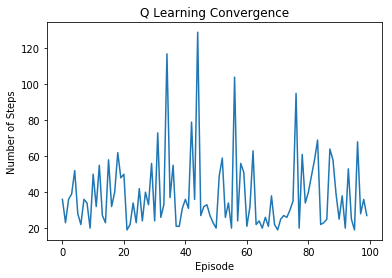

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
x = []
for i in range(100):
    x.append(i)
y = agent.steps
plt.plot(x,y)
plt.ylabel('Number of Steps')
plt.xlabel('Episode')
plt.title('Q Learning Convergence')
plt.show()

In [9]:
min(agent.steps)

19